## Import packages

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data

Read the file **header.pkl** with pandas as DataFrame and the file **seismic_data_source_1000.nc** with xarray as DataSet

In [2]:
header = pd.read_pickle("header_new.pkl")
seismic_datax= xr.open_dataset("seismic_data_source_1000.nc")
maxtime=4
seismic_data=seismic_datax.where((seismic_datax.time<=maxtime), drop=True)
seismic_data

<xarray.Dataset>
Dimensions:  (cdp: 1180, time: 2001, twt: 4001)
Coordinates:
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 3.994 3.996 3.998 4.0
  * cdp      (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
Data variables:
    data     (cdp, time) float32 26.84 25.84 23.84 29.84 ... 148.7 138.7 120.7
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

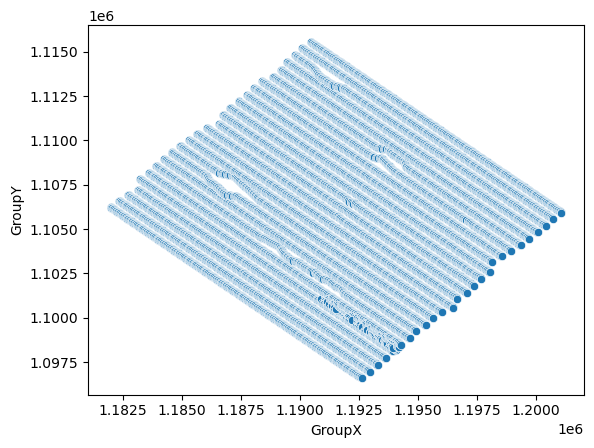

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1,9,1,1,23,0,12,0,1,...,0,0,0,0,0,0,133195.117308,1.613410e+06,133695.147082,1.613429e+06
1,2,2,9,2,1,24,0,12,0,1,...,0,0,0,0,0,0,133243.281522,1.613410e+06,133695.147082,1.613429e+06
2,3,3,9,3,1,25,0,12,0,1,...,0,0,0,0,0,0,133290.704658,1.613410e+06,133695.147082,1.613429e+06
3,4,4,9,4,1,26,0,12,0,1,...,0,0,0,0,0,0,133338.868872,1.613411e+06,133695.147082,1.613429e+06
4,5,5,9,5,1,27,0,12,0,1,...,0,0,0,0,0,0,133386.292008,1.613411e+06,133695.147082,1.613429e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981934,8666679,2981935,3628,1916,2933,210725,0,12,0,1,...,0,0,0,0,0,0,147364.797755,1.626009e+06,144561.355938,1.625250e+06
2981935,8666680,2981936,3628,1917,2933,210726,0,12,0,1,...,0,0,0,0,0,0,147412.961969,1.626009e+06,144561.355938,1.625250e+06
2981936,8666681,2981937,3628,1918,2933,210727,0,12,0,1,...,0,0,0,0,0,0,147460.385105,1.626009e+06,144561.355938,1.625250e+06
2983819,8670862,2983820,3530,2084,2935,206392,0,12,0,1,...,0,0,0,0,0,0,147509.220738,1.626009e+06,144792.985494,1.624750e+06


In [3]:
rec_pos=header.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=rec_pos, x="GroupX", y="GroupY")
plt.show()
rec_pos

## Create new dimensions
Compute **Azimuth** and **Offset** from sources and receivers positions.

In [4]:
pos_x=np.array(header['ReceiverX']-header['SourceX_new'], dtype='f')
pos_y=np.array(header['ReceiverY']-header['SourceY_new'], dtype='f')
azimuth = np.degrees(np.arctan2(pos_x, pos_y))
ida = np.where(azimuth < 0)
azimuth[ida] = azimuth[ida] + 360
backazimuth = np.mod(azimuth + 180, 360)
offset = np.linalg.norm([pos_x,pos_y], axis=0)  
header['Azimuth']=azimuth
header['Backazimuth']=backazimuth
header['Offset']=offset
header

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Backazimuth,Offset
0,1,1,9,1,1,23,0,12,0,1,...,0,0,0,133195.117308,1.613410e+06,133695.147082,1.613429e+06,267.878143,87.878143,500.372864
1,2,2,9,2,1,24,0,12,0,1,...,0,0,0,133243.281522,1.613410e+06,133695.147082,1.613429e+06,267.710022,87.710022,452.226715
2,3,3,9,3,1,25,0,12,0,1,...,0,0,0,133290.704658,1.613410e+06,133695.147082,1.613429e+06,267.411469,87.411469,404.855530
3,4,4,9,4,1,26,0,12,0,1,...,0,0,0,133338.868872,1.613411e+06,133695.147082,1.613429e+06,267.135345,87.135345,356.723969
4,5,5,9,5,1,27,0,12,0,1,...,0,0,0,133386.292008,1.613411e+06,133695.147082,1.613429e+06,266.656677,86.656677,309.381653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,10252258,3566874,3437,1204,3645,216988,0,12,0,1,...,0,0,0,147364.797755,1.626009e+06,147626.850767,1.625997e+06,272.668884,92.668884,262.337555
3566874,10252259,3566875,3437,1205,3645,216989,0,12,0,1,...,0,0,0,147412.961969,1.626009e+06,147626.850767,1.625997e+06,273.390594,93.390594,214.263855
3566875,10252260,3566876,3437,1206,3645,216990,0,12,0,1,...,0,0,0,147460.385105,1.626009e+06,147626.850767,1.625997e+06,274.279694,94.279694,166.931122
3566876,10252261,3566877,3437,1207,3645,216991,0,12,0,1,...,0,0,0,147509.220738,1.626009e+06,147626.850767,1.625997e+06,275.908142,95.908142,118.258194


Histogram of the **Azimuth** for the source 1000.

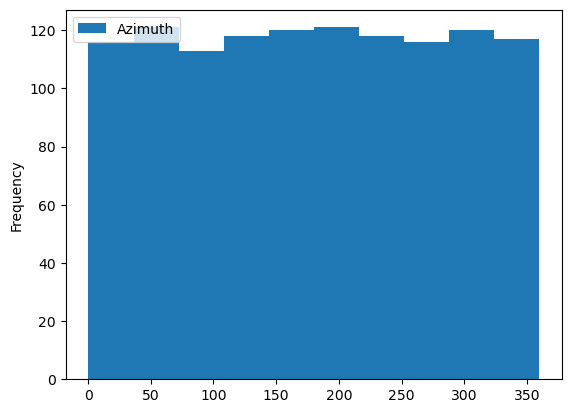

In [5]:
source=1000
shot_pos=header[header['EnergySourcePoint']==source]
shot_pos[['Azimuth']].plot.hist()
plt.show()

## Highligth position by shot patch
Show receivers from the source 1000.

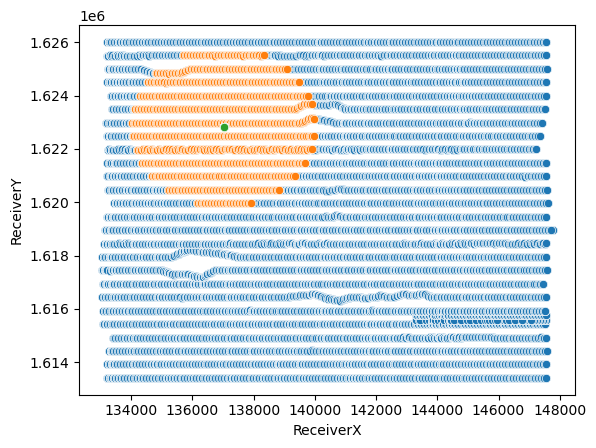

In [6]:
sns.scatterplot(data=header, x="ReceiverX", y="ReceiverY")
sns.scatterplot(data=shot_pos, x="ReceiverX", y="ReceiverY")
sns.scatterplot(data=shot_pos, x="SourceX_new", y="SourceY_new")
plt.show()

## Highligth position by azimuth bin
Show receivers fro the source 1000 with azimuth from 90 to 110.

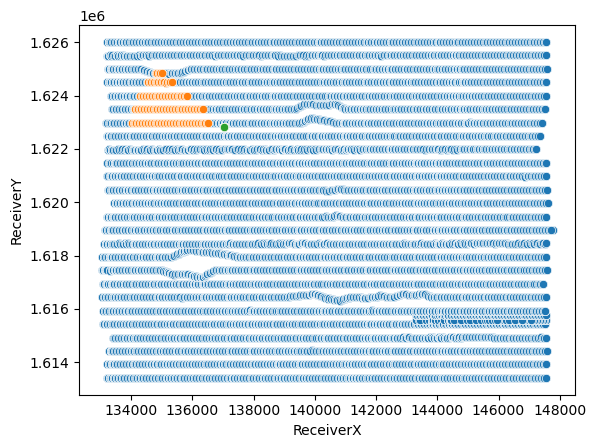

In [7]:
bazi=90
dbaz=45
bazf=bazi+dbaz                  #Limit values of azimuth
minof=500
shot_backazimuth_pos=shot_pos[(shot_pos['Backazimuth']>bazi)&(shot_pos['Backazimuth']<bazf)&(shot_pos['Offset']>minof)]
sns.scatterplot(data=header, x="ReceiverX", y="ReceiverY")
sns.scatterplot(data=shot_backazimuth_pos, x="ReceiverX", y="ReceiverY")
sns.scatterplot(data=shot_backazimuth_pos, x="SourceX_new", y="SourceY_new")
plt.show()

In [8]:
import pickle
with open('inter_topo.pkl', 'rb') as f:
     rbf = pickle.load(f)
x_pts=shot_pos[['SourceX_new','ReceiverX']].to_numpy().astype('f')
y_pts=shot_pos[['SourceY_new','ReceiverY']].to_numpy().astype('f')
xt = np.transpose(np.linspace(x_pts[:,0],x_pts[:,1],10))
yt = np.transpose(np.linspace(y_pts[:,0],y_pts[:,1],10))
zt = rbf(xt,yt)
geodesic = np.sum(np.linalg.norm([np.diff(xt),np.diff(yt),np.diff(zt)], axis=0), axis=1)
shot_pos['Geodesic']=geodesic
shot_pos

/tmp/ipykernel_177210/3632952993.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_pos['Geodesic']=geodesic


,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Backazimuth,Offset,Geodesic
871637,2370881,871638,3225,290,1000,137174,0,12,0,1,...,0,0,136136.843809,1.619959e+06,137020.002344,1.622822e+06,197.141586,17.141602,2996.459473,3112.522238
871638,2370882,871639,3225,291,1000,137175,0,12,0,1,...,0,0,136184.336604,1.619960e+06,137020.002344,1.622822e+06,196.276260,16.276245,2981.657471,3083.321909
871639,2370883,871640,3225,292,1000,137176,0,12,0,1,...,0,0,136232.500818,1.619960e+06,137020.002344,1.622822e+06,195.386200,15.386200,2968.078613,3059.462079
871640,2370884,871641,3225,293,1000,137177,0,12,0,1,...,0,0,136280.665033,1.619961e+06,137020.002344,1.622822e+06,194.488174,14.488159,2955.222168,3041.965395
871641,2370885,871642,3225,294,1000,137178,0,12,0,1,...,0,0,136328.829247,1.619961e+06,137020.002344,1.622822e+06,193.582520,13.582520,2943.097900,3026.308619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872812,2373481,872813,3225,2890,1000,184955,0,12,0,1,...,0,0,138135.597686,1.625503e+06,137020.002344,1.622822e+06,22.590700,202.590698,2904.095703,2928.895944
872813,2373482,872814,3225,2891,1000,184956,0,12,0,1,...,0,0,138183.761900,1.625504e+06,137020.002344,1.622822e+06,23.458851,203.458847,2923.354980,2949.059148
872814,2373483,872815,3225,2892,1000,184957,0,12,0,1,...,0,0,138231.856455,1.625503e+06,137020.002344,1.622822e+06,24.325537,204.325531,2941.960693,2969.103499
872815,2373484,872816,3225,2893,1000,184958,0,12,0,1,...,0,0,138280.020669,1.625503e+06,137020.002344,1.622822e+06,25.170732,205.170731,2962.539062,2990.309692


In [9]:
seismic_data["backazimuth"] = ("backazimuth",  shot_pos['Backazimuth'])
seismic_data["azimuth"] = ("backazimuth",  shot_pos['Azimuth'])
seismic_data["geodesic"] = ("backazimuth",  shot_pos['Geodesic'])
seismic_data["offset"] = ("backazimuth",  shot_pos['Offset'])
seismic_data["recx"] = ("backazimuth",  shot_pos['ReceiverX'])
seismic_data["recy"] = ("backazimuth",  shot_pos['ReceiverY'])
seismic_data["data"] = (("backazimuth", "time"), np.array(seismic_data.data))
seismic_data

<xarray.Dataset>
Dimensions:      (backazimuth: 1180, time: 2001, twt: 4001, cdp: 1180)
Coordinates:
  * twt          (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time         (time) float32 0.0 0.002 0.004 0.006 ... 3.994 3.996 3.998 4.0
  * cdp          (cdp) int32 871637 871638 871639 ... 872814 872815 872816
  * backazimuth  (backazimuth) float32 17.14 16.28 15.39 ... 204.3 205.2 206.0
Data variables:
    data         (backazimuth, time) float32 26.84 25.84 23.84 ... 138.7 120.7
    azimuth      (backazimuth) float32 197.1 196.3 195.4 ... 24.33 25.17 26.0
    geodesic     (backazimuth) float64 3.113e+03 3.083e+03 ... 3.011e+03
    offset       (backazimuth) float32 2.996e+03 2.982e+03 ... 2.984e+03
    recx         (backazimuth) float64 1.361e+05 1.362e+05 ... 1.383e+05
    recy         (backazimuth) float64 1.62e+06 1.62e+06 ... 1.626e+06 1.626e+06
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

In [10]:
data  = seismic_data.where((seismic_data.backazimuth>=bazi)&(seismic_data.backazimuth<bazf)&(seismic_data.offset>minof), drop=True)  #Select traces for the azimuth bin
data

<xarray.Dataset>
Dimensions:      (backazimuth: 155, time: 2001, twt: 4001, cdp: 1180)
Coordinates:
  * twt          (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time         (time) float32 0.0 0.002 0.004 0.006 ... 3.994 3.996 3.998 4.0
  * cdp          (cdp) int32 871637 871638 871639 ... 872814 872815 872816
  * backazimuth  (backazimuth) float32 93.09 93.15 93.21 ... 133.5 134.2 134.8
Data variables:
    data         (backazimuth, time) float32 3.0 10.0 7.0 ... -171.4 -171.4
    azimuth      (backazimuth) float32 273.1 273.2 273.2 ... 313.5 314.2 314.8
    geodesic     (backazimuth) float64 3.196e+03 3.157e+03 ... 2.968e+03
    offset       (backazimuth) float32 3e+03 2.952e+03 ... 2.882e+03 2.848e+03
    recx         (backazimuth) float64 1.34e+05 1.341e+05 ... 1.35e+05 1.35e+05
    recy         (backazimuth) float64 1.623e+06 1.623e+06 ... 1.625e+06
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

In [11]:
[Time,Off]=np.meshgrid(data.time,data.offset)

In [12]:
dt= seismic_data.sample_rate*1e-3
Vel = Off/(Time+dt)
Vel.shape

(155, 2001)

In [13]:
data.data.T.shape

(2001, 155)

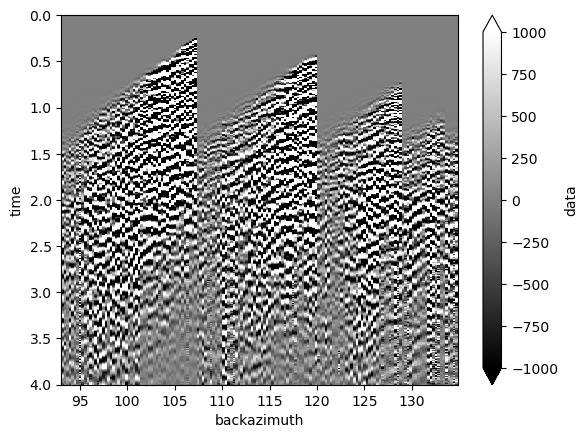

In [14]:
alpha=5e-3
data.data.values = data.data.values*(1+np.tanh(alpha*(Vel-400)))*(1+np.tanh(alpha*(2000-Vel)));
data.data.plot.imshow('backazimuth','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper')

In [15]:
import masw_functions as mf
# Define parameters
fmin, fmax = 0.8,5 
vmin, vmax = 400,3000
vel = np.linspace(vmin, vmax, 151)
p = 1.0 / vel
theta = np.linspace(bazi, bazf, 50)

# Receiver coordinates (assuming rec_x and rec_y are defined)
rec_x = data.recx-shot_backazimuth_pos['SourceX_new']
rec_y = data.recy-shot_backazimuth_pos['SourceY_new']

[m_LRT, f_LRT, Pw_LRT]=mf.adj_beam_LRT(data.data.T.values, dt, rec_x, rec_y, p, theta, fmin, fmax)

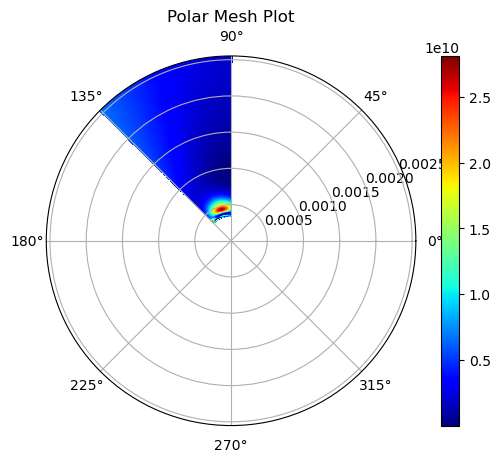

In [16]:
# Convert theta to radians
theta_rad = np.deg2rad(theta)

# Create meshgrid
P, Theta = np.meshgrid(p[::-1], theta_rad,  indexing='ij')
#Theta, P = np.meshgrid( theta_rad, p[::-1],  indexing='ij')
# Select frequency index to plot
frequency_index =0  # Change as needed
Pw_LRT_slice = np.abs(Pw_LRT[:, :, frequency_index])

# Plotting

# Subplot 1: Polar pcolormesh
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
c = ax.pcolormesh(Theta, P, Pw_LRT_slice, shading='auto', cmap='jet')
fig.colorbar(c, ax=ax)
ax.set_title('Polar Mesh Plot')

plt.show()

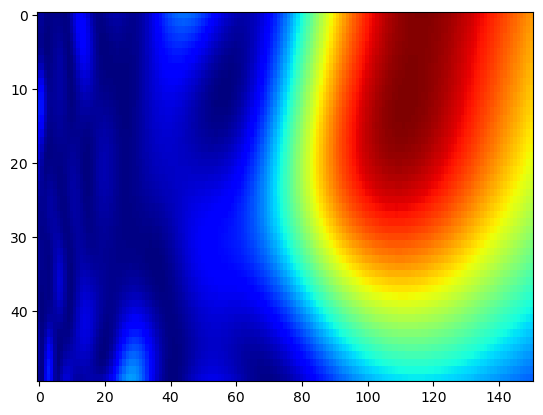

In [17]:
# Sum along the first axis and permute dimensions
sumP = np.sum(Pw_LRT, axis=1)  # Summing along the first axis (equivalent to MATLAB sum(Pw_LRT, 1))
#sumP = np.transpose(sumP, (1, 0))  # Permute the dimensions (MATLAB permute([2,3,1]))
plt.imshow(Pw_LRT[:,:,9].T, aspect='auto', cmap='jet')


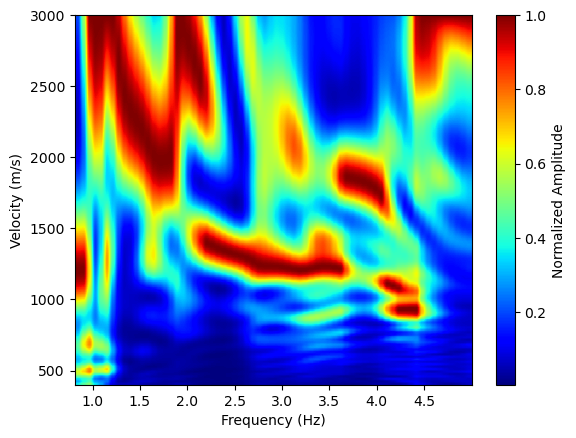

In [18]:
# Sum along the first axis and permute dimensions
sumP = np.sum(Pw_LRT, axis=1)  # Summing along the first axis (equivalent to MATLAB sum(Pw_LRT, 1))
#sumP = np.transpose(sumP, (1, 0))  # Permute the dimensions (MATLAB permute([2,3,1]))

# Normalize by the maximum value of sumP
sumPn = sumP / np.max(sumP,axis=0)

# Plot the result
plt.figure()
plt.imshow(sumPn, origin='lower',aspect='auto', cmap='jet', extent=[f_LRT.min(), f_LRT.max(), vel.min(), vel.max()])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Velocity (m/s)')
plt.colorbar(label='Normalized Amplitude')
plt.show()

In [19]:
#from scipy.io import savemat

#savemat('rec_x.mat', {'rec_x': rec_x})
#savemat('rec_y.mat', {'rec_y': rec_y})
#savemat('data.mat', {'data': seismic_data.data.T})